В этом блоке мы познакомимся с тем, как строить и интерпретировать ACF и  PACF

В примерах 1-6 мы посмотрим, как выглядят коррелограммы для искусственно сгенерированных AR, MA и ARMA рядов

В примере 7 поглядим на коррелограммы реальных данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline



Создадим функции, которые будут генерировать процессы AR(1), MA(1), AR(2), AR(3), ARMA(2,2) со стандартным нормальным белым шумом

In [23]:
# ar геренирует ряд AR(1) без константы с коэффициентом phi
def ar(num: int, phi: float) -> np.ndarray:
    """AR(1) sequince formed by rule: X[i] = phi * X[i-1] + eps[i]

    Args:
        num (int): lenght of sequence
        phi (float): constant сoefficient

    Returns:
        numpy.ndarray: AR(1) array
    """
    eps = np.random.normal(size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range(1, num):
        walk[i] = phi * walk[i - 1] + eps[i]
    return walk


# ma геренирует ряд MA(1) без константы с коэффициентом theta
def ma(num, theta):
    eps = np.random.normal(size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range(1, num):
        walk[i] = theta * eps[i - 1] + eps[i]
    return walk


# ar2 геренирует ряд AR(2) без константы с коэффициентами phi1, phi2
def ar2(num, phi1, phi2):
    eps = np.random.normal(size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range(1, num):
        walk[i] = phi1 * walk[i - 1] + phi2 * walk[i - 2] + eps[i]
    return walk


# ar3 геренирует ряд AR(3) без константы с коэффициентами phi1, phi2, phi3
def ar3(num, phi1, phi2, phi3):
    eps = np.random.normal(size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range(1, num):
        walk[i] = phi1 * walk[i - 1] + phi2 * walk[i - 2] + phi3 * walk[i - 3] + eps[i]
    return walk


# arma22 геренирует ряд ARMA(22) без константы с коэффициентами phi1, phi2, theta1, theta2
def arma22(num, phi1, phi2, theta1, theta2):
    eps = np.random.normal(size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range(1, num):
        walk[i] = (
            phi1 * walk[i - 1]
            + phi2 * walk[i - 2]
            + eps[i]
            + theta1 * eps[i - 1]
            + theta2 * eps[i - 2]
        )
    return walk


def plot_acf_pacf(data: np.ndarray, title: str) -> None:
    plt.style.use("ggplot")
    plt.figure(figsize=(17, 9))

    ax = plt.subplot(311)
    ax.plot(data)
    ax.set_title(title)

    ax = plt.subplot(312)
    sm.graphics.tsa.plot_acf(data.squeeze(), lags=100, ax=ax)

    ax = plt.subplot(313)
    sm.graphics.tsa.plot_pacf(data.squeeze(), lags=100, ax=ax)

    print("p-value теста Дики-Фуллера:", sm.tsa.stattools.adfuller(data)[1])
    plt.show()


Сгенерируем процесс MA(1) и нарисуем его график

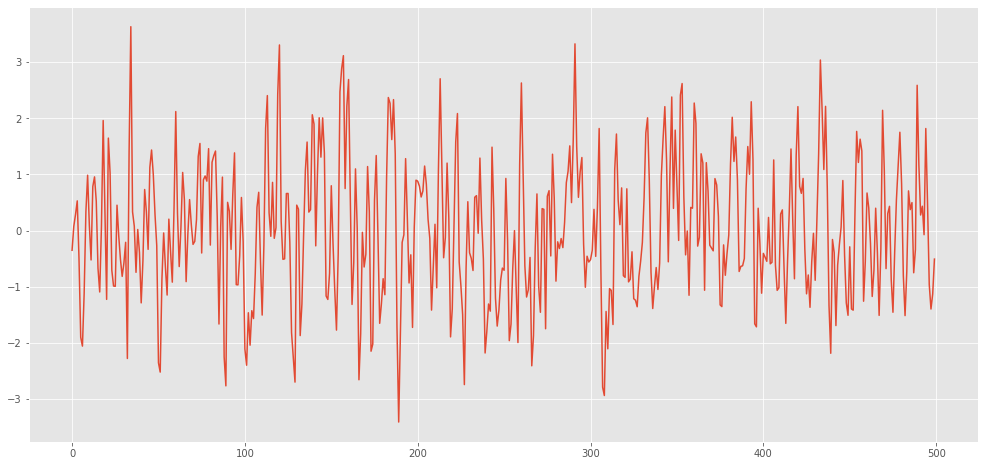

In [3]:
plt.style.use("ggplot")
ma1 = ma(500, 0.7)
plt.figure(figsize=(17, 8))
plt.plot(ma1)

## Пример 1
Построим acf и pacf для сгенерированного процесса. 

p-value теста Дики-Фуллера: 9.23858524968155e-21


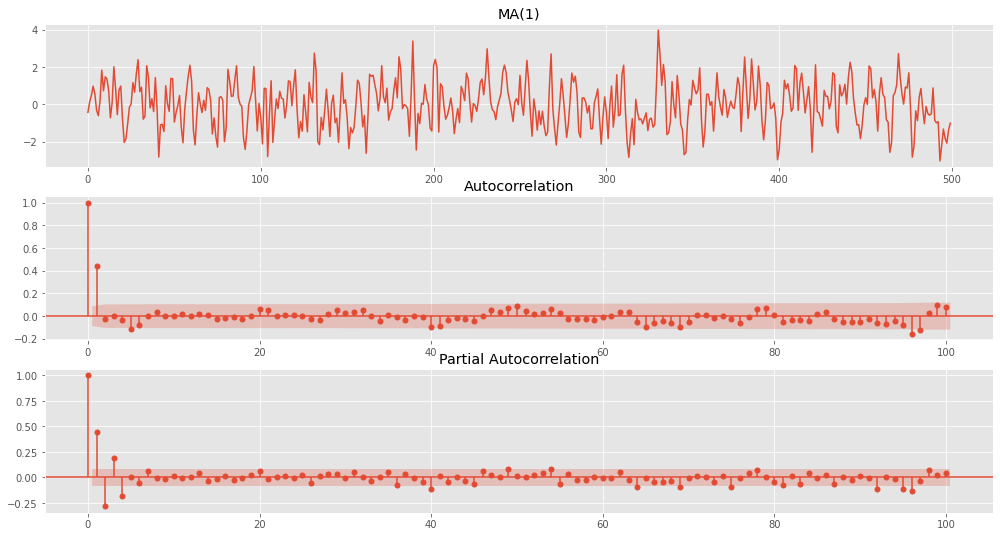

In [26]:
plot_acf_pacf(ma(500, 0.7), "MA(1)")

Основная информация о MA модели содержится в ее acf коррелограмме. На ней явно видно, что первый лаг существенно отличается от нуля, а последующие лежат в рамках синей области, то есть их можно с большой уверенностью считать нулями

## Пример 2
Сгенерируем процесс белого шума и нарисуем его график

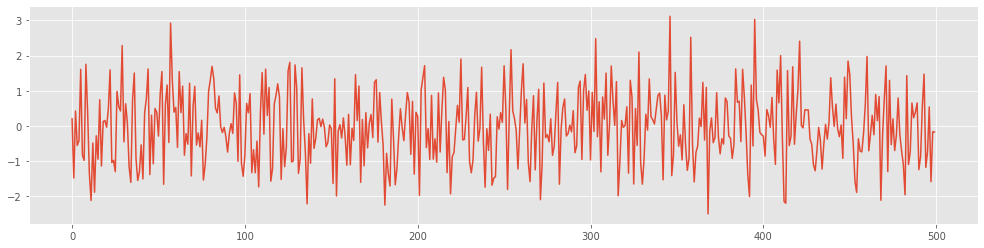

In [6]:
eps = np.random.normal(size=500)
plt.figure(figsize=(17, 4))
plt.plot(eps)
plt.show()

Визуально процесс белого шума не сильно отличается от MA(1)

Однако на коррелограммах разница заметна:

p-value теста Дики-Фуллера: 2.5784917146285048e-15


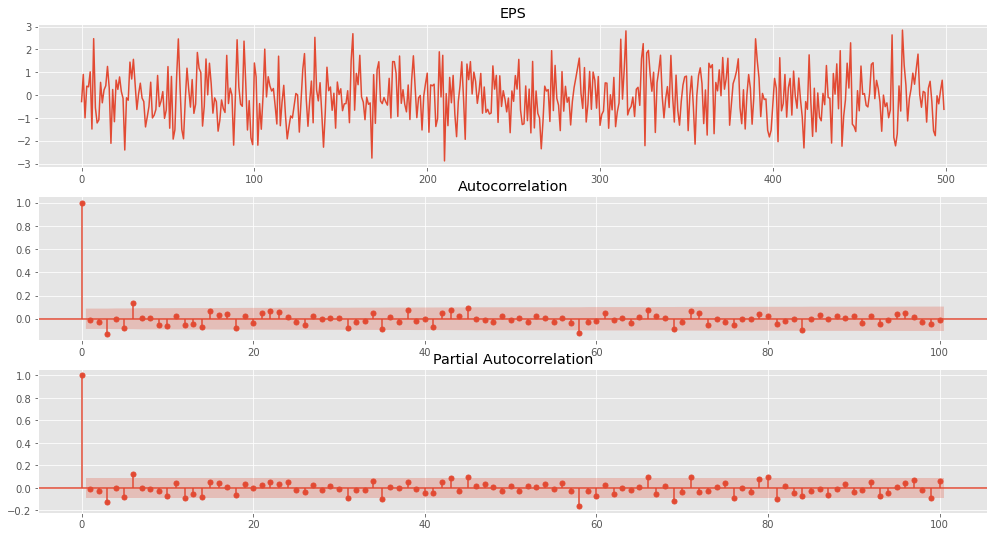

In [27]:
plot_acf_pacf(np.random.normal(size=500), "EPS")

Как видите, у белого шума нет сущесвенно отличных от нуля лагов на обеих коррелограммах. Это вполне понятно, тк процесс белого шума является совершенно хаотичным

## Пример 3

Сгенерируем процесс авторегрессии AR(1) и нарисуем его график

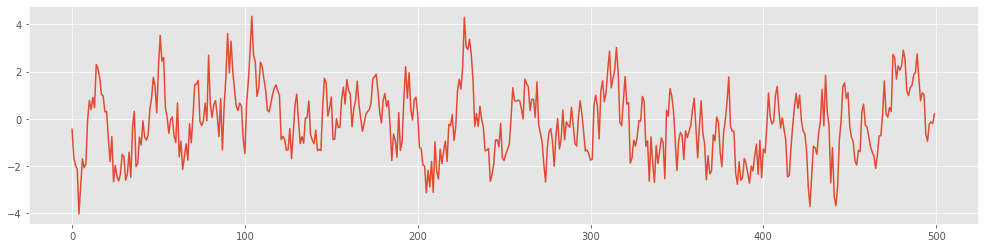

In [8]:
ar1 = ar(500, 0.8)
plt.style.use("ggplot")
plt.figure(figsize=(17, 4))
plt.plot(ar1)
plt.show()

Снова сложно отличить это случайное блуждание от белого шума. Давайте посмотрим на коррелограммы

p-value теста Дики-Фуллера: 1.4587473117285592e-08


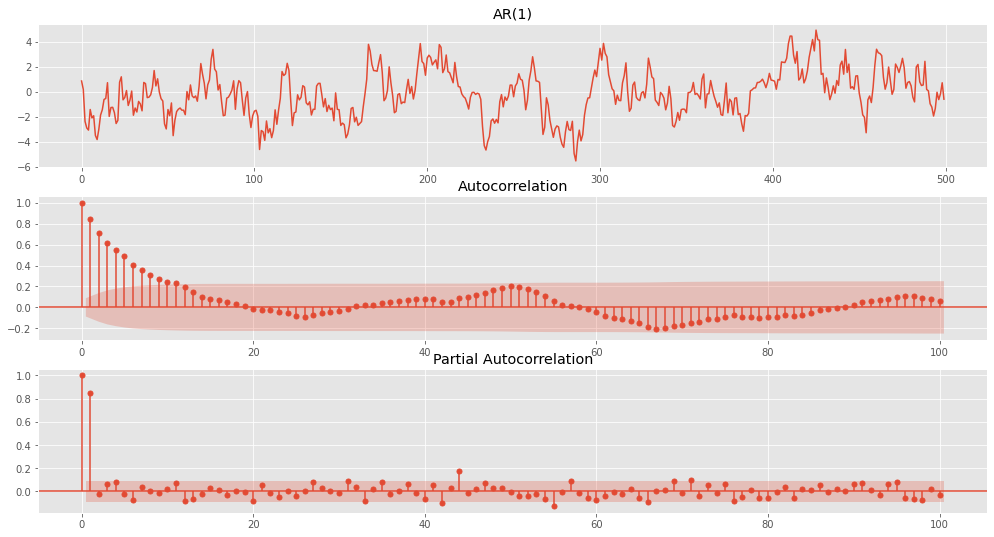

In [28]:
plot_acf_pacf(ar(500, 0.8), "AR(1)")

Коррелограмма ACF типична для процессов типа AR(1). Видим на ней в начале убывание лагов по геометрической прогресии, как и предсказывает нам теория

На частичной коррелограмме PACF мы видим один лаг (первый), сильно отличающийся от нуля.

## Пример 4

Сгенерируем процесс авторегрессии AR(2) и AR(3) и нарисуем их коррелограммы

p-value теста Дики-Фуллера: 4.0502593164223786e-05


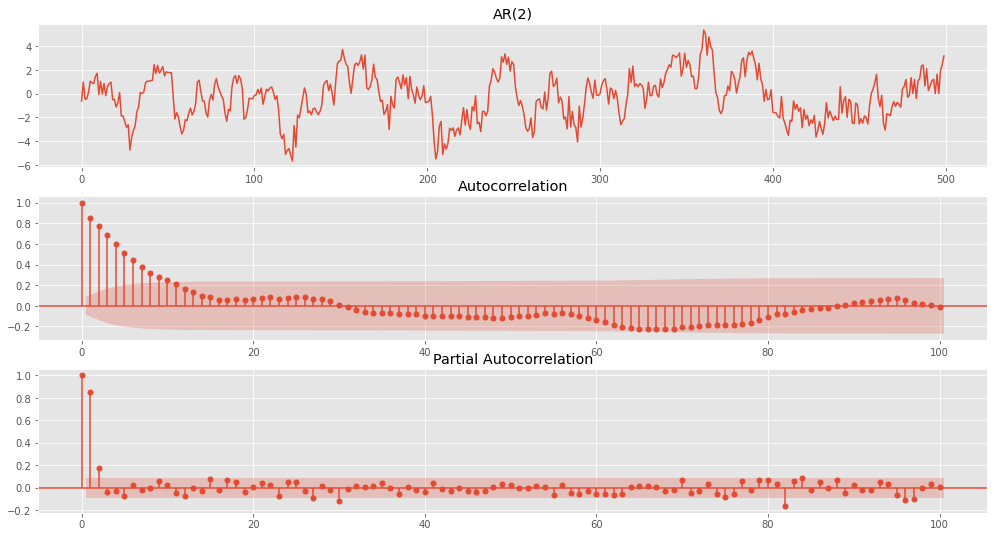

In [30]:
plot_acf_pacf(
    ar2(500, 0.7, 0.2),
    "AR(2)",
)


p-value теста Дики-Фуллера: 9.547088251068507e-08


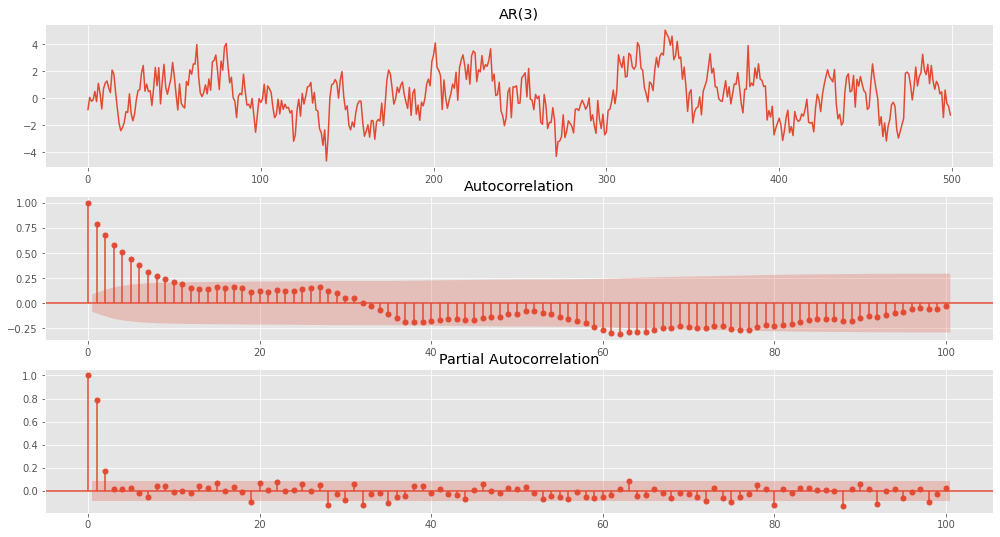

In [31]:
plot_acf_pacf(
    ar3(500, 0.7, 0.2, -0.1),
    "AR(3)",
)

Снова типичная картинка ACF для AR(p) процессов - экспоненциальное (т.е. по геометрической прогрессии) убывание лагов

## Пример 5

Давайте посмотрим, как выглядят коррелограммы нестационарных рядов.

Сгенерируем случайное блуждание с коэффициентом 1

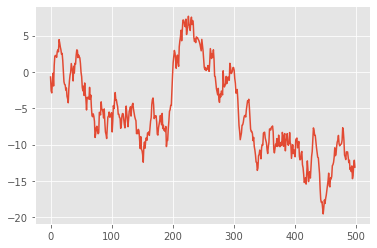

In [32]:
ar_n = ar(500, 1)
plt.plot(ar_n)
plt.show()

p-value теста Дики-Фуллера: 0.9954133579346394


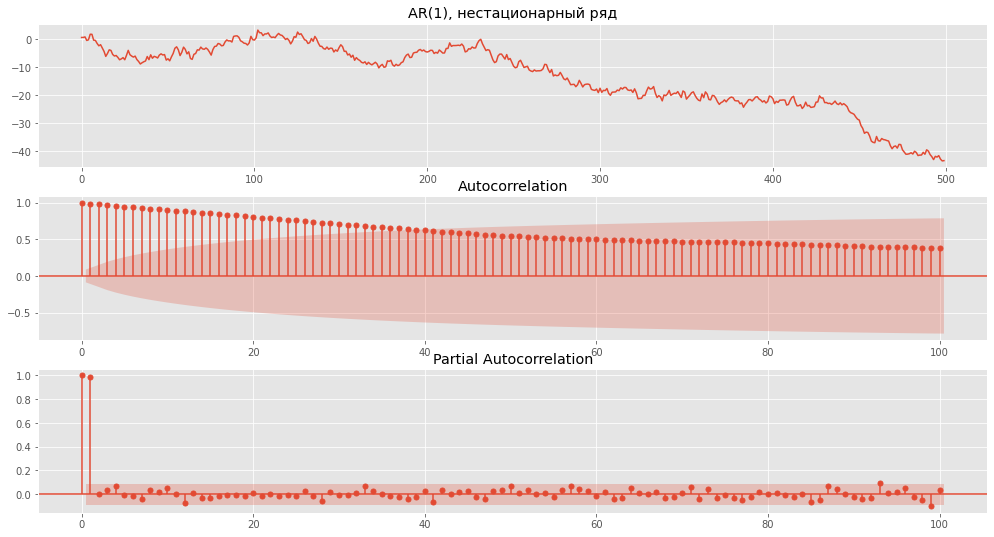

In [33]:
plot_acf_pacf(
    ar(500, 1),
    "AR(1), нестационарный ряд",
)

Ряд имеет ярко выраженный (хоть и случайный) тренд. Это сказывается на его ACF коррелограмме - автокорреляции завышены

На частичной коррелограмме (PACF) видим один отличный от нуля лаг - первый

## Пример 6

Сгенерируем ряд  ARMA(2,2) и посмотрим на его коррелограммы. Для комбинированных моделей ARMA(p,q) коррелограммы могут некорректно отражать количество параметров

p-value теста Дики-Фуллера: 2.688156986424471e-09


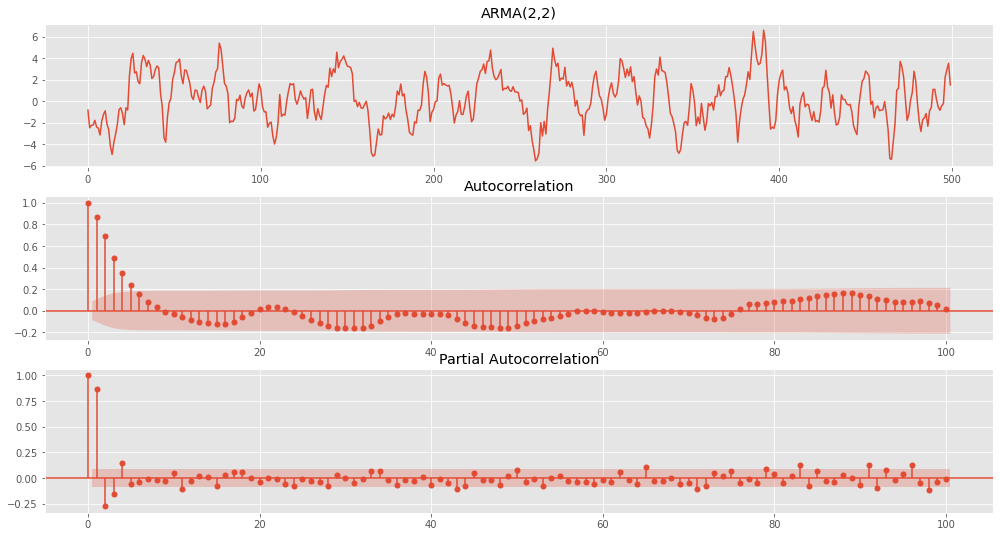

In [35]:
plot_acf_pacf(
    arma22(500, 0.5, 0.2, 0.6, 0.3),
    "ARMA(2,2)"
)


## Пример 7

Нарисуем коррелограммы для конфетного временного ряда

p-value теста Дики-Фуллера: 0.3381775973004306


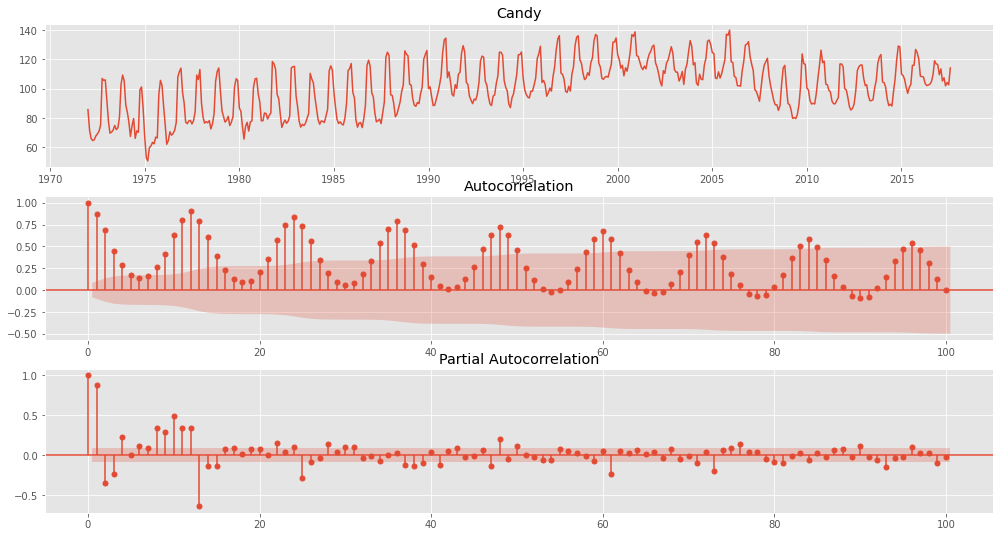

In [36]:
df = pd.read_csv("./candy_production.csv")
df["observation_date"] = pd.to_datetime(df["observation_date"], format="%Y-%m-%d")
df = df.set_index(pd.DatetimeIndex(df["observation_date"]))
df.drop(["observation_date"], axis=1, inplace=True)

plot_acf_pacf(df.IPG3113N, "Candy")

Обратите внимание на ACF - именно так выглядит комбинация тренда и сезонности. Тренд сдвигает значения корреляций вверх, а сезонность добавляет колебания с постоянным (это важно!) периодом